In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
## Importando os datasets

arquivo_01 = 'tenant_reviews.csv'
arquivo_02 = 'tenant_reviews_clean.csv'
arquivo_03 = 'visits_contracts.csv'
arquivo_04 = 'visits_offers_contracts.csv'

df_01 = pd.read_csv(arquivo_01, sep = ';')
df_02 = pd.read_csv(arquivo_02, sep = ';')
df_03 = pd.read_csv(arquivo_03, sep = ';')
df_04 = pd.read_csv(arquivo_04, sep = ';')

# EDA - Exploratory Data Analysis

## Visits Contracts Dataset

Este dataset contem as informações de assinatura ou não assinatura do contrato de acordo com o numero de visitas feitas aos imóveis. </p>
> * Total de visitas é de: **11516**.</p>
> * Total de contratos assinados: **668**.</p>
> * A taxa de contratos _assinados x não assinados_ é de: **6,16%**.</p>

---

Abaixo poderemos detectar que:

> * **45,5%** dos imóveis sofrem apenas uma visita, com taxa de fechamento de assinatura de **2,91%**. </p>
> * Somando os imóveis que sofreram entre 2 e 3 visitas, temos **31,32%** do total de visitas no período analisado. A taxa de fechamento de assinaturas corresponde a **9,18%** e **12,55%**, respectivamente, ficando acima da média de geral de fechamento.</p>

---


Com base com os dados analisados neste dataset:</p>
__Indicação de melhoria na qualidade do atendimento na primeira visita e/ou acompanhamento das necessidades do cliente e acompanhar indicador para analise das ações.__</p>
__Indicação de sempre sugerir uma segunda visita ao imóvel, onde os agents possam criar uma oportunidade com maior taxa de fechamento de assinatura do contrato do imóvel.__</p>

In [3]:
df_03

,visits,tenants_that_did_not_sign,tenants_that_signed
0,1,"5,091",148
1,2,"2,199",124
2,3,"1,176",108
3,4,510,64
4,5,396,84
5,6,384,64
6,7,261,32
7,8,216,20
8,9,210,12
9,10,132,4


In [4]:
df_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   visits                     15 non-null     int64 
 1   tenants_that_did_not_sign  15 non-null     object
 2   tenants_that_signed        15 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 488.0+ bytes


In [5]:
# It seemns that collumn 'visits' refers to a number of visits before tenants sign the contract
# We'll change to continuous to categorical
df_03['visits']  = df_03['visits'].astype('object') 

In [6]:
# Removing comma from feature 'tenants_that_did_not_sign' and tranforming in numerical

df_03['tenants_that_did_not_sign'] = df_03['tenants_that_did_not_sign'].str.replace(',','').astype('float')

In [7]:
df_03[['tenants_that_did_not_sign', 'tenants_that_signed']].sum()

tenants_that_did_not_sign    10848.0
tenants_that_signed            668.0
dtype: float64

In [8]:
total_median = round((df_03['tenants_that_signed'].sum() / df_03['tenants_that_did_not_sign'].sum()) * 100, 2)
total_median

6.16

In [9]:
df_03['sing_rate'] = round((df_03['tenants_that_signed'] / (df_03['tenants_that_did_not_sign'] + (df_03['tenants_that_signed']))) * 100, 2)
df_03

,visits,tenants_that_did_not_sign,tenants_that_signed,sing_rate
0,1,5091.0,148,2.82
1,2,2199.0,124,5.34
2,3,1176.0,108,8.41
3,4,510.0,64,11.15
4,5,396.0,84,17.50
5,6,384.0,64,14.29
6,7,261.0,32,10.92
7,8,216.0,20,8.47
8,9,210.0,12,5.41
9,10,132.0,4,2.94


In [10]:
total_tenants = sum(df_03['tenants_that_did_not_sign']) + sum(df_03['tenants_that_signed'])
df_03['total_visits_rate'] = round(((((df_03['tenants_that_did_not_sign']) + (df_03['tenants_that_signed'])) / total_tenants) * 100),2)
df_03

,visits,tenants_that_did_not_sign,tenants_that_signed,sing_rate,total_visits_rate
0,1,5091.0,148,2.82,45.49
1,2,2199.0,124,5.34,20.17
2,3,1176.0,108,8.41,11.15
3,4,510.0,64,11.15,4.98
4,5,396.0,84,17.50,4.17
5,6,384.0,64,14.29,3.89
6,7,261.0,32,10.92,2.54
7,8,216.0,20,8.47,2.05
8,9,210.0,12,5.41,1.93
9,10,132.0,4,2.94,1.18


#### Taxa de Visitas Por Quantidade de Visitas Feitas

* calculo: visitas feitas por categoria / soma de todas as visitas

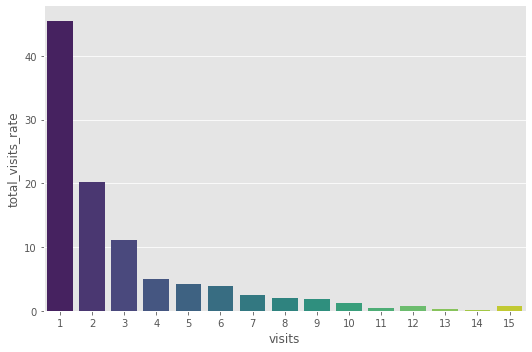

In [11]:
## Porcentagem de Cada Numero de Visitas

plt.style.use('ggplot')
g = sns.FacetGrid(df_03, size=5, aspect=1.5)
g.map(sns.barplot, "visits", "total_visits_rate", palette='viridis');

#### Taxa de Assinatura de Contratos por Categoria
* calculo: numero de contratos assinados / soma todos os contratos</p>

A linha vermelha representa a taxa de assinatura média total.

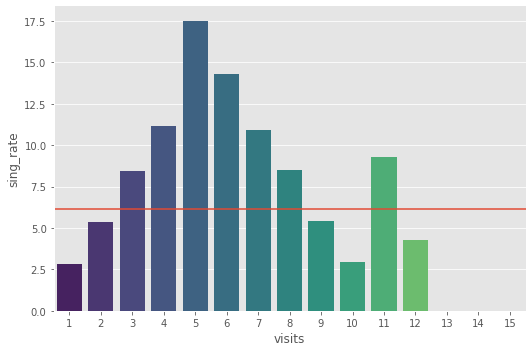

In [12]:
plt.style.use('ggplot')
g = sns.FacetGrid(df_03, size=5, aspect=1.5)
g.map(sns.barplot, "visits", "sing_rate", palette='viridis')

#  Adding total_median line
plt.axhline(total_median)

plt.show()

#### Numero de Contratos Não Assinados Por Categoria

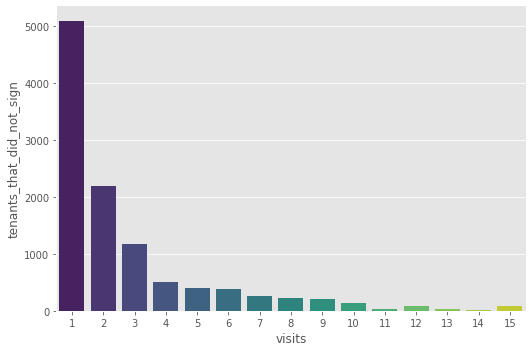

In [13]:
plt.style.use('ggplot')
g = sns.FacetGrid(df_03, size=5, aspect=1.5)
g.map(sns.barplot, "visits", "tenants_that_did_not_sign", palette='viridis')

plt.show()

#### Numero de Contratos Assinados Por Categoria

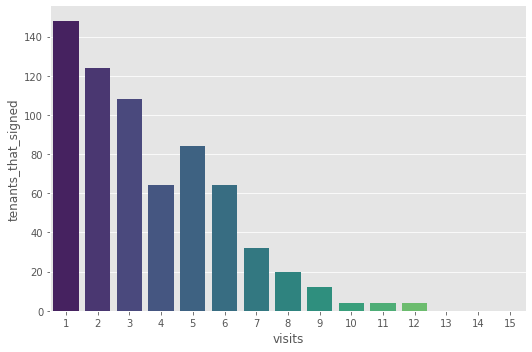

In [14]:
plt.style.use('ggplot')
g = sns.FacetGrid(df_03, size=5, aspect=1.5)
g.map(sns.barplot, "visits", "tenants_that_signed", palette='viridis')

plt.show()

## Visits Offers Contracts

Este dataset contem as informações de acompanhamento mensal dos imóveis e as seguintes características:</p>

> * visits: número de visitas </p>
> * tenant_that_visited: número de inquilinos que agendaram visitas.</p>
> * visited_houses: número de casas que tiveram agendamento de visitas.</p>
> * offers: número de ofertas feitas.</p>
> * tenants_that_made_offers: número inquilinos que ofertaram.</p>
> * contracts: número contratos assinados.</p>

---

Abaixo poderemos detectar que:

> * Houve uma tendencia de aumento de número de inquilinos que agendaram visitas, entretanto o número de casas visitadas no último trimestre diminiu. </p>
> * O número total de contratos fechados está em queda desde o ínicio dos registros existentes neste dataset, tendo uma queda de aproximadamente **48%** no periodo analisado. </p>
> * O número de ofertas feitas no último trimestre esta um pouco abaixo da média. </p>
> * O número de ofertas feitas no último trimestre esta um pouco abaixo da média. </p>

---
Com base com os dados analisados neste dataset:</p>
__Criar cluster dos usuários que estão utilizando a plataforma afim de descobrir o perfil de clientes, uma vez que o numero total de clientes que estão acessando a plataforma esta em crescimento mas o número de fechamento de contratos esta diminuindo.__</p>
__Fazer pesquisa de satisfação para entender o motivo de inquilinos não estarem fazendo novas ofertas, mesmo com o numero de visitas agendadas por inquilinos ter aumentado.__</p>

In [15]:
df_04

,month,visits,tenant_that_visited,visited_houses,offers,tenants_that_made_offers,contracts
0,jan,"7,130","4,678","4,140","3,924","2,977",724
1,fev,"7,132","5,193","4,322","3,658","2,461",689
2,mar,"6,933","5,322","4,299","3,791","2,526",667
3,abr,"7,342","5,844","3,150","2,453","1,699",603
4,mai,"7,238","6,112","4,006","3,587","2,645",544
5,jun,"8,377","6,710","3,250","3,011","1,583",542
6,jul,"8,130","7,122","3,993","3,500","1,801",443
7,ago,"8,288","7,630","4,155","3,431","1,857",376


In [16]:
df_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   month                     8 non-null      object
 1   visits                    8 non-null      object
 2   tenant_that_visited       8 non-null      object
 3   visited_houses            8 non-null      object
 4   offers                    8 non-null      object
 5   tenants_that_made_offers  8 non-null      object
 6   contracts                 8 non-null      int64 
dtypes: int64(1), object(6)
memory usage: 576.0+ bytes


In [17]:
df_04.loc[ 1: ]

,month,visits,tenant_that_visited,visited_houses,offers,tenants_that_made_offers,contracts
1,fev,"7,132","5,193","4,322","3,658","2,461",689
2,mar,"6,933","5,322","4,299","3,791","2,526",667
3,abr,"7,342","5,844","3,150","2,453","1,699",603
4,mai,"7,238","6,112","4,006","3,587","2,645",544
5,jun,"8,377","6,710","3,250","3,011","1,583",542
6,jul,"8,130","7,122","3,993","3,500","1,801",443
7,ago,"8,288","7,630","4,155","3,431","1,857",376


In [18]:
df_04['visits'] = df_04['visits'].str.replace(',','').astype('float')
df_04['tenant_that_visited'] = df_04['tenant_that_visited'].str.replace(',','').astype('float')
df_04['visited_houses'] = df_04['visited_houses'].str.replace(',','').astype('float')
df_04['offers'] = df_04['offers'].str.replace(',','').astype('float')
df_04['tenants_that_made_offers'] = df_04['tenants_that_made_offers'].str.replace(',','').astype('float')

In [19]:
df_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   month                     8 non-null      object 
 1   visits                    8 non-null      float64
 2   tenant_that_visited       8 non-null      float64
 3   visited_houses            8 non-null      float64
 4   offers                    8 non-null      float64
 5   tenants_that_made_offers  8 non-null      float64
 6   contracts                 8 non-null      int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 576.0+ bytes


In [20]:
df_04.sum()

month                       janfevmarabrmaijunjulago
visits                                       60570.0
tenant_that_visited                          48611.0
visited_houses                               31315.0
offers                                       27355.0
tenants_that_made_offers                     17549.0
contracts                                       4588
dtype: object

#### Numero de Visitas Por Mes

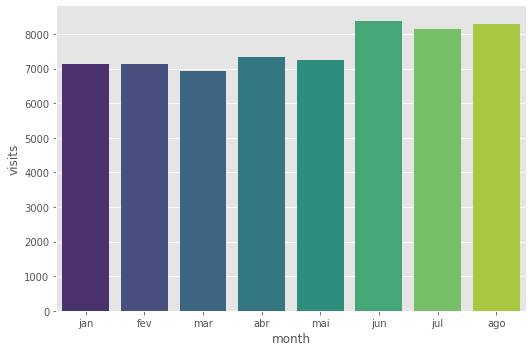

In [21]:
plt.style.use('ggplot')
g = sns.FacetGrid(df_04, size=5, aspect=1.5)
g.map(sns.barplot, "month", "visits", palette='viridis')

plt.show()

#### Quantidade de Imoveis Registrados na Plataforma Por Mes

O gráfico abaixo representa o número de imoveis registrado na plataforma ao longo dos meses. </p>
Durante os meses de abrril a junho houve uma queda acentuada de imoveis registrados, no ultimo bimestre este número foi resgatado para acima da média. </p>
Mesmo com essa baixa, vimos acima que o número de visitas realizadas não sofreu queda. 

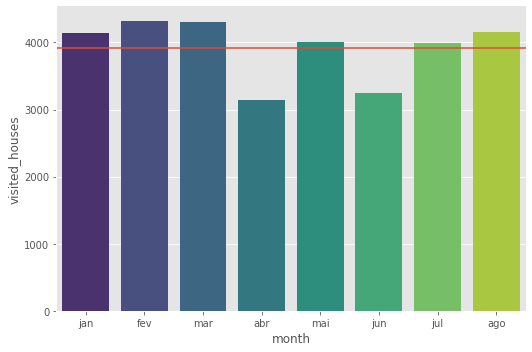

In [22]:
plt.style.use('ggplot')
g = sns.FacetGrid(df_04, size=5, aspect=1.5)
g.map(sns.barplot, "month", "visited_houses", palette='viridis')

#  Adding total_median line
plt.axhline(df_04['visited_houses'].mean())

plt.show()

#### Quantidade de Inquilinos que Realizaram Visitas Por Mes

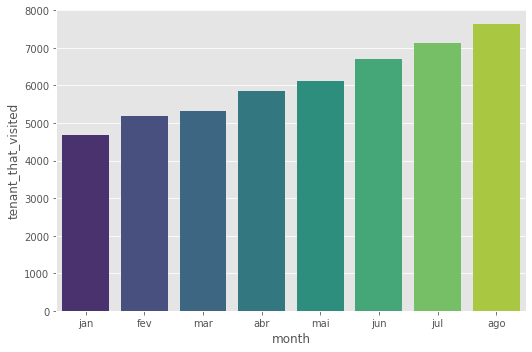

In [23]:
plt.style.use('ggplot')
g = sns.FacetGrid(df_04, size=5, aspect=1.5)
g.map(sns.barplot, "month", "tenant_that_visited", palette='viridis')

plt.show()

#### Quantidade Ofertas Feitas por Inquilinos na Plataforma Por Mes

O número de inquilinos que fizeram uma oferta está em queda após o primeiro trimestre, tendo registrado um pico no mes de maio. </p>
A linha em vermelho representa a média aparada (10%).

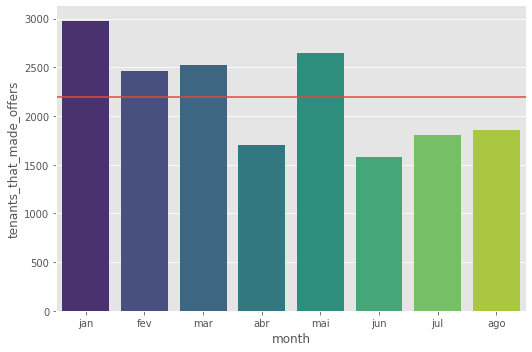

In [24]:
plt.style.use('ggplot')
g = sns.FacetGrid(df_04, size=5, aspect=1.5)
g.map(sns.barplot, "month", "tenants_that_made_offers", palette='viridis')

# For this case we'll use the trimmed mean to compare the number of tenants that made offers along time
plt.axhline(stats.trim_mean(df_04['tenants_that_made_offers'], 0.1))

plt.show()

#### Quantidade Ofertas na Plataforma Por Mes

O número de ofertas feitas ao longo do período analisado. </p>
A linha em vermelho representa a média aparada (10%).

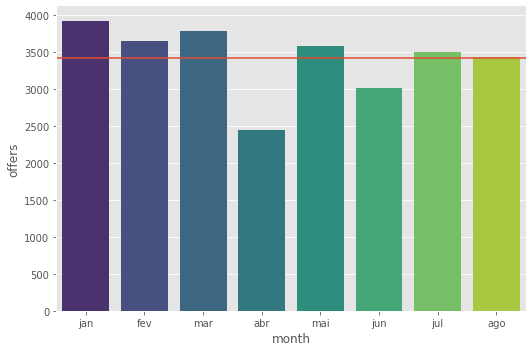

In [25]:
plt.style.use('ggplot')
g = sns.FacetGrid(df_04, size=5, aspect=1.5)
g.map(sns.barplot, "month", "offers", palette='viridis')

plt.axhline(stats.trim_mean(df_04['offers'], 0.1))

plt.show()

#### Quantidade Contratos na Plataforma Por Mes


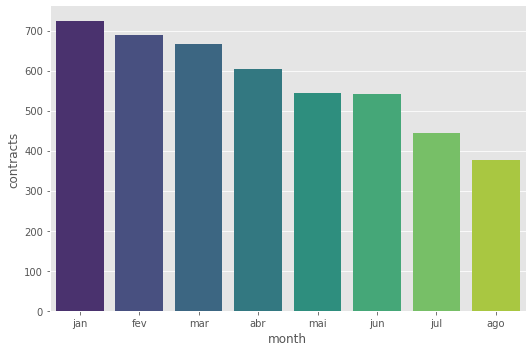

In [26]:
plt.style.use('ggplot')
g = sns.FacetGrid(df_04, size=5, aspect=1.5)
g.map(sns.barplot, "month", "contracts", palette='viridis')

plt.show()

In [27]:
df_04.corr()

,visits,tenant_that_visited,visited_houses,offers,tenants_that_made_offers,contracts
visits,1.000000,0.888321,-0.370056,-0.343493,-0.777455,-0.824084
tenant_that_visited,0.888321,1.000000,-0.229909,-0.330744,-0.748945,-0.984795
visited_houses,-0.370056,-0.229909,1.000000,0.911782,0.678628,0.141055
offers,-0.343493,-0.330744,0.911782,1.000000,0.781182,0.258856
tenants_that_made_offers,-0.777455,-0.748945,0.678628,0.781182,1.000000,0.654182
contracts,-0.824084,-0.984795,0.141055,0.258856,0.654182,1.000000


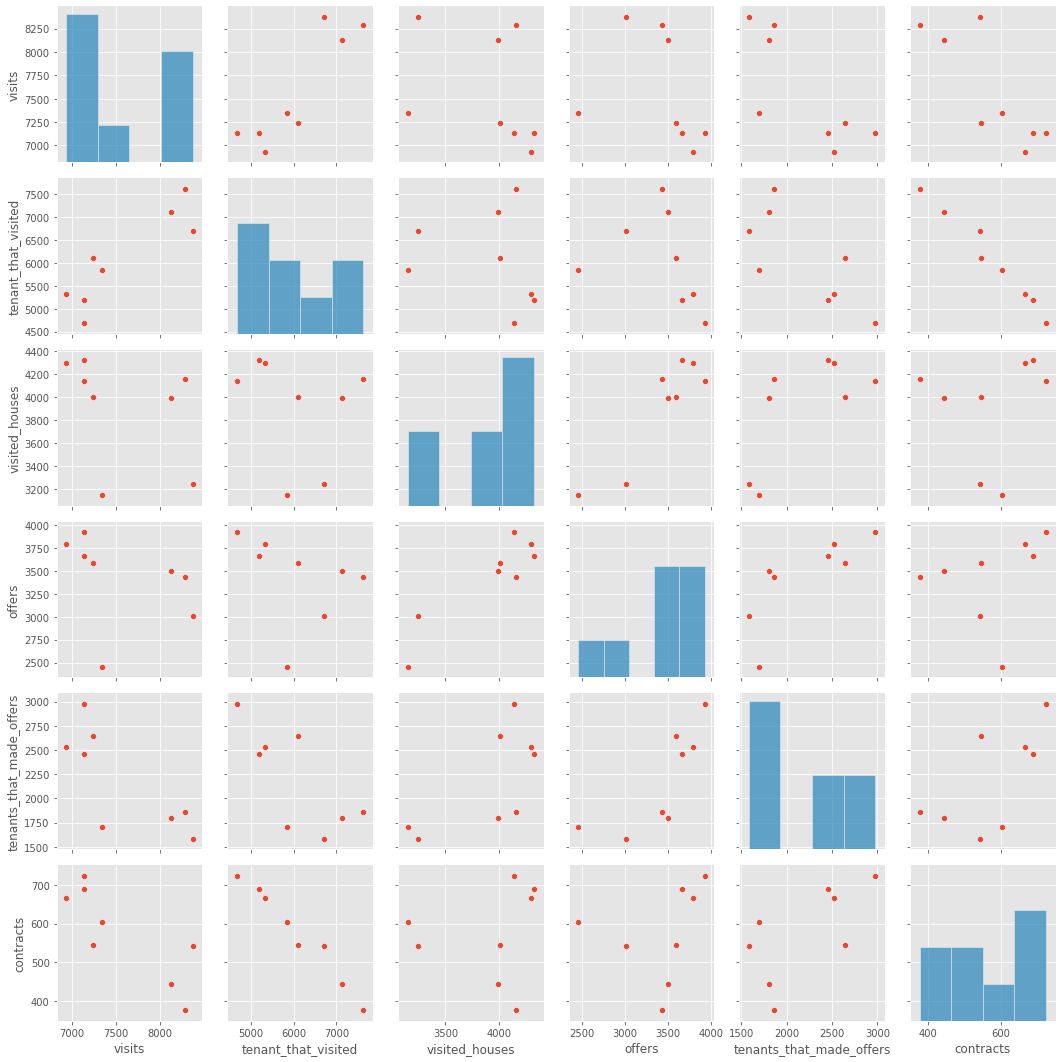

In [28]:
# Pairplot
plt.style.use('ggplot')
plot_01 = sns.pairplot(df_04 , palette='viridis')

## Tenant Reviews

Este dataset contem as informações de review das visitas agendadas na plataforma, contendo as seguintes informações: </p>

> * visit_date: data da visita
> * day: data da visita
> * time: horário agendado da visita
> * house_id: id do imovel
> * neighbourhood: bairro do imovel
> * visitor: cliente que agendou a visita
> * agent: corretor que realizou a visita
> * review: nota entre 0 e 5 de avaliação do imóvel</p>

Os seguintes indicadores obtiveram crescimento dentro do periodo analisado: visitantes, agentes, bairros e casas. </p> Apesar dos números apresentados o resultado em obtenção de contratos continua a diminiuir.

* Qual a qualidade das casas apresentadas e o treinamento e qualidade dos atendimentos dados pelos corretores?</p>
* Qual era o cenário no primeiro trimestre, que houve um bom numero de fechamento de contratos?

---

variaveis booleanas (True/ False):

> * building
> * size
> * price
> * location
> * did_not_like_the_location
> * expected_a_better_preserved_property
> * bigger_in_photos
> * different_from_the_listing
> * others: observações do cliente</p>

As observações de conotação negativa: __did_not_like_the_location, expected_a_better_preserved_property, bigger_in_photos e different_from_the_listing__ não apresentaram um crescimento expressivo nas avaliações.</p> 
As observações que mais são adicionadas pelos usuários são: __conservation, size e location__

Com base com os dados analisados neste dataset:</p> 
**Apesar de o registro de usuarios e imoveis na plataforma estar em crescimento os reviews a respeito da qualidade do imovel não teve o mesmo crescimento.**</p>
**Criação de um monitor de desempenho por região e as características que mais pesam na tomada de decisão de fechamento do contrato. Acompanhar indicador afim de replicar o sucesso nos contratos fechados**</p>

In [29]:
df_02.head()

,visit_date,day,time,house_id,neighbourhood,visitor,agent,review,building,conservation,size,price,location,did_not_like_the_location,expected_a_better_preserved_property,bigger_in_photos,different_from_the_listing,others
0,2017-12-27,2017-12-27,12:30,"892,815,605",Perdizes,Maria,Flávio,4,False,False,False,False,False,False,False,True,False,NaN
1,2018-01-03,1/3/2018,13:15,"892,807,836",Vila Mariana,Katherine,José,3,False,False,False,False,False,False,False,False,False,o zelador muito inflexível. nos deixou pra for...
2,2018-01-03,2018-01-03,11:15,"892,815,815",Jardim Paulista,Michelle,Sueli,Visita não aconteceu.,False,False,False,False,False,False,False,False,False,NaN
3,2018-01-03,2018-01-03,10:30,"892,812,970",Jardim Paulista,Michelle,Sueli,Visita não aconteceu.,False,False,False,False,False,False,False,False,False,NaN
4,2018-01-03,2018-01-03,14:15,"892,803,143",Consolação,Lívia,Juliana,Visita não aconteceu.,False,False,False,False,False,False,False,False,False,NaN


In [30]:
import stat

In [31]:
df_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13470 entries, 0 to 13469
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   visit_date                            13470 non-null  object
 1   day                                   13470 non-null  object
 2   time                                  13470 non-null  object
 3   house_id                              13470 non-null  object
 4   neighbourhood                         13468 non-null  object
 5   visitor                               13470 non-null  object
 6   agent                                 13470 non-null  object
 7   review                                13470 non-null  object
 8   building                              13470 non-null  bool  
 9   conservation                          13470 non-null  bool  
 10  size                                  13470 non-null  bool  
 11  price                       

### 1.1 - visit_date

In [32]:
df_02['visit_date'].min()

'2017-12-27'

In [33]:
df_02['visit_date'].max()

'2018-08-31'

In [34]:
df_02[['year', 'month', 'day']] = df_02['visit_date'].str.split('-', expand=True)

In [35]:
df_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13470 entries, 0 to 13469
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   visit_date                            13470 non-null  object
 1   day                                   13470 non-null  object
 2   time                                  13470 non-null  object
 3   house_id                              13470 non-null  object
 4   neighbourhood                         13468 non-null  object
 5   visitor                               13470 non-null  object
 6   agent                                 13470 non-null  object
 7   review                                13470 non-null  object
 8   building                              13470 non-null  bool  
 9   conservation                          13470 non-null  bool  
 10  size                                  13470 non-null  bool  
 11  price                       

In [36]:
df_02 = df_02[df_02['year'] != '2017']

### 1.2 - review

In [37]:
review_analise = df_02.groupby('review').agg({'month' : 'count'})
review_analise = review_analise.rename(columns = {'month' : 'total_reviews'})
review_analise

,total_reviews
review,
1,364
2,635
3,1416
4,2049
5,5671
EntradaNaoAutorizada,1
VaiNegociar,30
Visita não aconteceu.,3300


In [38]:
# Visitas que não aconteceram geram registro no banco de dados mas para a analise apenas temos os dados enviezados. Estas anotações serão excluidas do analise
df_02 = df_02[df_02['review'] != 'Visita não aconteceu.']

In [39]:
review_analise = df_02.groupby(['month', 'review']).agg({'review' : 'count'}).fillna(0)
review_analise

review
month review                      
01    1                         36
      2                         50
      3                        155
      4                        184
      5                        485
      VaiNegociar                3
02    1                         39
      2                         70
      3                        161
      4                        192
      5                        522
03    1                         57
      2                         81
      3                        173
      4                        247
      5                        708
04    1                         38
      2                         94
      3                        159
      4                        215
      5                        568
      VaiNegociar                3
05    1                         37
      2                         53
      3                        118
      4                        211
      5                        519
      VaiNegociar                1
06    1                         46
      2                         73
      3                        179
      4                        271
      5                        765
      EntradaNaoAutorizada       1
      VaiNegociar                8
07    1                         44
      2                         97
      3                        210
      4                        321
      5                        873
      VaiNegociar                7
08    1                         67
      2                        117
      3                        261
      4                        408
      5                       1231
      VaiNegociar                8

In [40]:
review_analise = df_02.groupby('review', 'month').agg({'month' : 'count'})
review_analise

ValueError: No axis named month for object type DataFrame

## 1.2 - house_id

#### 1.2.1 - Numero de Imoveis com Registro de Visita na Plataforma
Abaixo temos a progressão de numeros unicos de imoveis que receberam visitas. Mais imoveis estão sendo anunciados e tendo visitas agendadas desde o inicio do periodo analisado

In [41]:
df_02['house_id'].nunique()

5312

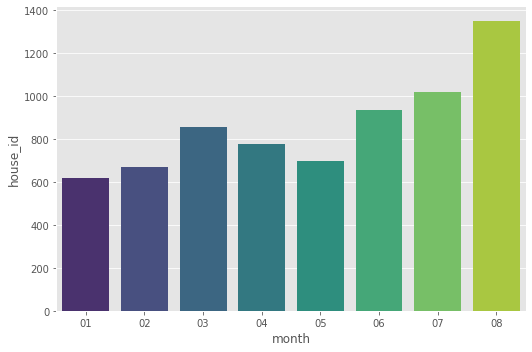

In [42]:
# O numero de imoveis cadastrados na plataforma aumentou, esta mudança se deve ao fator de menos contratos estarem sendo assinados? 
# Ou o fato de mais imoveis cadastrados fez que o numero total de contratos assinados diminuissem?

x = df_02.groupby('month').agg({'house_id' : 'nunique'}).reset_index()

plt.style.use('ggplot')
g = sns.FacetGrid(x, size=5, aspect=1.5)
g.map(sns.barplot, "month", "house_id", palette='viridis')

plt.show()

#### 1.2.2 - number of visits 
Abaixo temos a quantidade de visitas agendadas na plataforma. O numero de visitas agendadas desde o inicio do periodo analisado esta em crescimento, ultrapassando a média total.</p>
A linha vermelha representa a média aparada (10%)

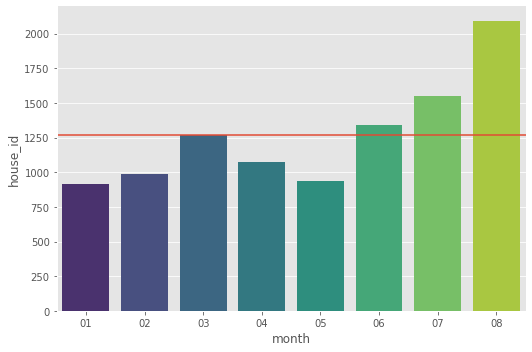

In [43]:
# O numero de visitas também aumentou ao longo dos meses, sendo que no ultimo trimestre este numero esta acima da média 

x = df_02.groupby('month').agg({'house_id' : 'count'}).reset_index()

plt.style.use('ggplot')
g = sns.FacetGrid(x, size=5, aspect=1.5)
g.map(sns.barplot, "month", "house_id", palette = 'viridis')

# For this case we'll use the trimmed mean to compare the number of tenants that made offers along time
plt.axhline(stats.trim_mean(x['house_id'].astype('float'), 0.1))

plt.show()

### 1.3 - neighbourhood
Abaixo temos a progressão de bairros que receberam visitas. Dentro do periodo analisado o ultimo trimestre apresenta a maior capilaridade de bairros.

In [44]:
df_02['neighbourhood'].nunique()

294

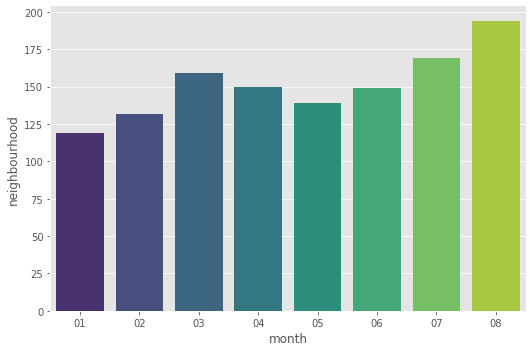

In [45]:
x = df_02.groupby('month').agg({'neighbourhood' : 'nunique'}).reset_index()

plt.style.use('ggplot')
g = sns.FacetGrid(x, size=5, aspect=1.5)
g.map(sns.barplot, "month", "neighbourhood", palette='viridis')

plt.show()

### 1.4 - visitor

In [46]:
df_02['visitor'].nunique()

1271

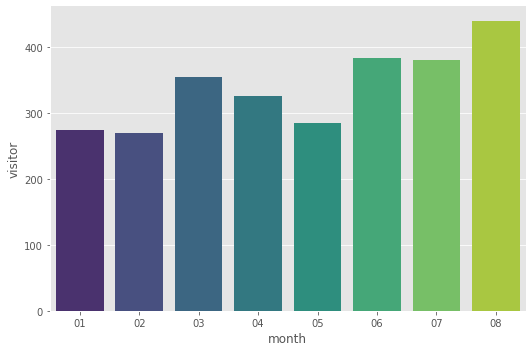

In [47]:
x = df_02.groupby('month').agg({'visitor' : 'nunique'}).reset_index()

plt.style.use('ggplot')
g = sns.FacetGrid(x, size=5, aspect=1.5)
g.map(sns.barplot, "month", "visitor", palette='viridis')

plt.show()

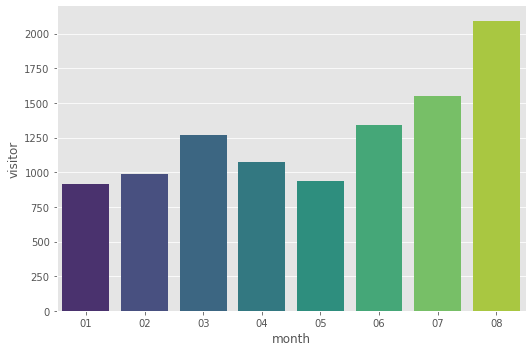

In [48]:
# O numero de regioes com imovel registrados na plataforma aumentou nos ultimos meses, ou seja, a plataforma esta crescendo a capilaridade.

x = df_02.groupby('month').agg({'visitor' : 'count'}).reset_index()

plt.style.use('ggplot')
g = sns.FacetGrid(x, size=5, aspect=1.5)
g.map(sns.barplot, "month", "visitor", palette='viridis')

plt.show()

### 1.5 - agent

Abaixo temos a progressão de corretores que agendaram visitas. Dentro do periodo analisado o ultimo trimestre apresenta a maior numero de agentes que agendaram visitas.

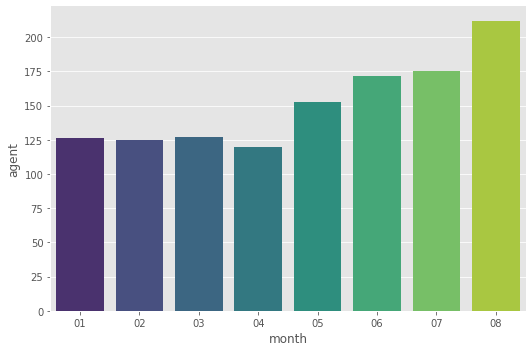

In [49]:
x = df_02.groupby('month').agg({'agent' : 'nunique'}).reset_index()

plt.style.use('ggplot')
g = sns.FacetGrid(x, size=5, aspect=1.5)
g.map(sns.barplot, "month", "agent", palette='viridis')

plt.show()

## 1.8 - Boolean Features

* building 
* conservation   
* size  
* price    
* location  
* did_not_like_the_location 
* expected_a_better_preserved_property
* bigger_in_photos
* different_from_the_listing

In [50]:
booleans_features = df_02.iloc[ : ,[8,9,10,11,12,13,14,15,16, -1]]
booleans_features.head()

,building,conservation,size,price,location,did_not_like_the_location,expected_a_better_preserved_property,bigger_in_photos,different_from_the_listing,month
1,False,False,False,False,False,False,False,False,False,01
6,False,False,False,False,False,False,False,False,True,01
7,True,True,False,False,False,False,False,False,False,01
8,False,False,False,False,False,False,False,True,False,01
9,True,True,True,False,True,False,False,False,False,01


#### building

In [51]:
booleans_features.groupby(['building', 'month']).size()

building  month
False     01        660
          02        709
          03        920
          04        791
          05        685
          06        962
          07       1121
          08       1479
True      01        253
          02        275
          03        346
          04        286
          05        254
          06        381
          07        431
          08        613
dtype: int64

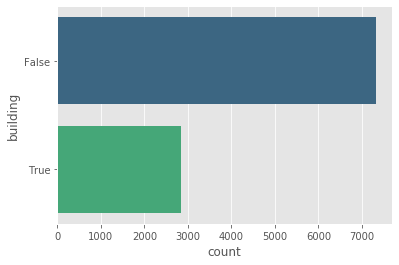

In [52]:
plt.style.use('ggplot')                               
                                                                                                                                                                                                                            
# Contplot
sns.countplot(data = booleans_features, y = 'building',palette='viridis');

<Figure size 1440x1152 with 0 Axes>

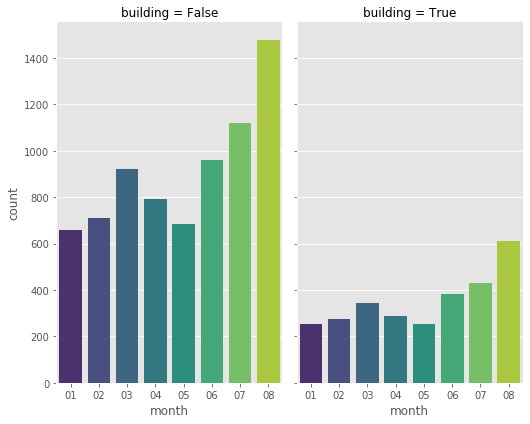

In [53]:
plt.figure(figsize=(20, 16))
plt.style.use('ggplot')

g = sns.catplot(data = booleans_features, x = "month",
            kind = "count", 
            col = 'building', col_wrap = 3,
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6,
            palette='viridis'); 

#### conservation

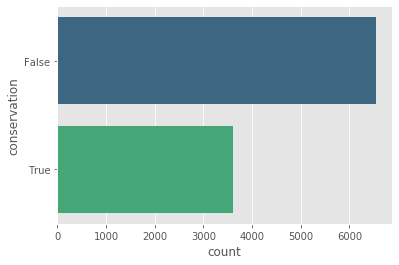

In [54]:
plt.style.use('ggplot')                               
                                                                                                                                                                                                                            
# Contplot
sns.countplot(data = booleans_features, y = 'conservation',palette='viridis');

In [ ]:
plt.figure(figsize=(20, 16))
plt.style.use('ggplot')

g = sns.catplot(data = booleans_features, x = "month",
            kind = "count", 
            col = 'conservation', col_wrap = 3,
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6,
            palette='viridis'); 

#### size

In [ ]:
plt.style.use('ggplot')                               
                                                                                                                                                                                                                            
# Contplot
sns.countplot(data = booleans_features, y = 'size', palette='viridis');

In [ ]:
plt.figure(figsize=(20, 16))
plt.style.use('ggplot')

g = sns.catplot(data = booleans_features, x = "month",
            kind = "count", 
            col = 'size', col_wrap = 3,
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6,
            palette='viridis'); 

#### price

In [ ]:
plt.style.use('ggplot')                               
                                                                                                                                                                                                                            
# Contplot
sns.countplot(data = booleans_features, y = 'price', palette='viridis');

In [ ]:
plt.figure(figsize=(20, 16))
plt.style.use('ggplot')

g = sns.catplot(data = booleans_features, x = "month",
            kind = "count", 
            col = 'price', col_wrap = 3,
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6,
            palette='viridis'); 

#### location

In [ ]:
plt.style.use('ggplot')                               
                                                                                                                                                                                                                            
# Contplot
sns.countplot(data = booleans_features, y = 'location',palette='viridis');

In [ ]:
plt.figure(figsize=(20, 16))
plt.style.use('ggplot')

g = sns.catplot(data = booleans_features, x = "month",
            kind = "count", 
            col = 'location', col_wrap = 3,
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6,
            palette='viridis'); 

#### did_not_like_the_location

In [ ]:
plt.style.use('ggplot')                               
                                                                                                                                                                                                                            
# Contplot
sns.countplot(data = booleans_features, y = 'did_not_like_the_location', palette='viridis');

In [ ]:
plt.figure(figsize=(20, 16))
plt.style.use('ggplot')

g = sns.catplot(data = booleans_features, x = "month",
            kind = "count", 
            col = 'did_not_like_the_location', col_wrap = 3,
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6,
            palette='viridis'); 

#### expected_a_better_preserved_property

In [ ]:
plt.style.use('ggplot')                               
                                                                                                                                                                                                                            
# Contplot
sns.countplot(data = booleans_features, y = 'expected_a_better_preserved_property',palette='viridis');

In [ ]:
plt.figure(figsize=(20, 16))
plt.style.use('ggplot')

g = sns.catplot(data = booleans_features, x = "month",
            kind = "count", 
            col = 'expected_a_better_preserved_property', col_wrap = 3,
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6,
            palette='viridis');

#### bigger_in_photos

In [ ]:
plt.style.use('ggplot')                               
                                                                                                                                                                                                                            
# Contplot
sns.countplot(data = booleans_features, y = 'bigger_in_photos',palette='viridis');

In [ ]:
plt.figure(figsize=(20, 16))
plt.style.use('ggplot')

g = sns.catplot(data = booleans_features, x = "month",
            kind = "count", 
            col = 'bigger_in_photos', col_wrap = 3,
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6,
            palette='viridis');

#### different_from_the_listing

In [ ]:
plt.style.use('ggplot')                               
                                                                                                                                                                                                                            
# Contplot
sns.countplot(data = booleans_features, y = 'different_from_the_listing',palette='viridis');

In [ ]:
plt.figure(figsize=(20, 16))
plt.style.use('ggplot')

g = sns.catplot(data = booleans_features, x = "month",
            kind = "count", 
            col = 'different_from_the_listing', col_wrap = 3,
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6,
            palette='viridis');